In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

def col(x):
    return np.array(np.matrix(x)).T

# White Noise

Consider the following stochastic process known as discrete-time white noise for all $n, r \in \mathbb{N}$:

$$\{X[n]\}_{n=0}^{\infty}$$
$$E[X[n]] = 0$$
$$\text{var}(X[n]) = \sigma^2$$
$$\text{cov}(X[n], X[r]) = 0$$
This stochastic process is widely used to model uncertainty in measurements. We also assume that $X[n]$ and $X[r]$ are independent for all $n, r \in \mathbb{N}$.


### a) We find the second-order characterization of this stochastic process.

It is known that the second-order characterization of a discrete-time stochastic process is fully defined by its **mean** $\mu_X[n]$ and its **autocorrelation function** $R_X[n,r]$. We proceed to find each of these components.

To find the mean, it is known that
$$\mu_X[n] = E[X[n]]$$
and by definition, we know that
$$E[X[n]] = 0$$
therefore,
$$\mu_X[n] = 0$$

To find the autocorrelation function, it is known that, by definition, it is given by
$$R_X[n,r] = E[X[n]X[r]]$$
Since we know that the random variables $X[n]$ and $X[r]$ are independent for all $n, r \in \mathbb{N}$, then
$$R_X[n,r] = E[X[n]X[r]] = E[X[n]]E[X[r]]$$
As we have already seen that $E[X[n]] = 0$, which also implies that $E[X[r]] = 0$,
$$R_X[n,r] = 0$$
for all $n \neq r$. However, when $n=r$ we have
$$R_X[n,r] = E[X[n]X[n]] = E[X[n]^2]$$
The question now is, what is the value of $E[X[n]^2]$?
We know that the variance of $X[n]$ is given by
$$\text{var}(X[n]) = E[X[n]^2] - \left(E[X[n]]\right)^2$$
But since $E[X[n]] = 0$,
$$\text{var}(X[n]) = E[X[n]^2] = \sigma^2$$
Therefore, it can be stated that

$$\begin{equation*}
R_X[n,r] = \left\{
        \begin{array}{ll}
            0 & \quad n \neq r \\
            \sigma^2 & \quad n = r
        \end{array}
    \right.
\end{equation*} $$


### b) We now assume that $X[n]$ is a continuous random variable following a Gaussian distribution (the stochastic process is discrete-time, but the random variables are continuous). Let $Z_{n,r} = [X[n],X[r]]^\intercal$. We find the PDF of the random vector $Z_{n,r}$, and clearly specify what the vector of expected values and the covariance matrix are.


The PDF of the random vector $Z_{n,r}$ is given by

$$f_Z(z) = \frac{1}{2\pi\sqrt{\det{C_Z}}}\exp\left(-\frac{1}{2}(z-\mu_Z)^\intercal C_Z^{-1} (z-\mu_Z)\right)$$

where

$$\mu_Z = \begin{bmatrix} \mu_X[n] \\ \mu_X[r] \end{bmatrix} = \begin{bmatrix} E[X[n]] \\ E[X[r]] \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

and

$$C_z = \begin{bmatrix} \sigma^2 & \text{cov}(X[n], X[r]) \\ \text{cov}(X[n], X[r]) & \sigma^2 \end{bmatrix} = \begin{bmatrix} \sigma^2 & 0 \\ 0 & \sigma^2 \end{bmatrix}$$


### c) We simulate a realization of the stochastic process $\{X[n]\}$ for values of $n$ from 0 to 1000, assuming that $\sigma^2 = 4$ and that $X[n]$ is Gaussian for all $n$.


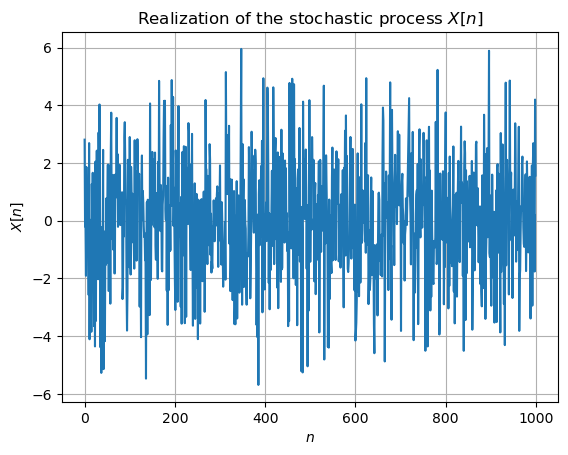

In [2]:
# Time vector
n = np.arange(0, 1000)

# Samples of a random variable with mean 0 and variance 4 (standard deviation 2) are created.
normal = np.random.normal(0, 2, len(n))

plt.plot(n, normal)
plt.title('Realization of the stochastic process $X[n]$')
plt.xlabel('$n$')
plt.ylabel('$X[n]$')
plt.grid()
plt.show()


It can be noted that the stochastic process is centered around 0, as indicated by its mean, and for each $n$ on the time axis, the value of the realization varies within values around the 4 indicated by its variance.


### d) For the realization of the stochastic process in part c), we calculate the frequency content through the magnitude of the Fourier transform (FT).


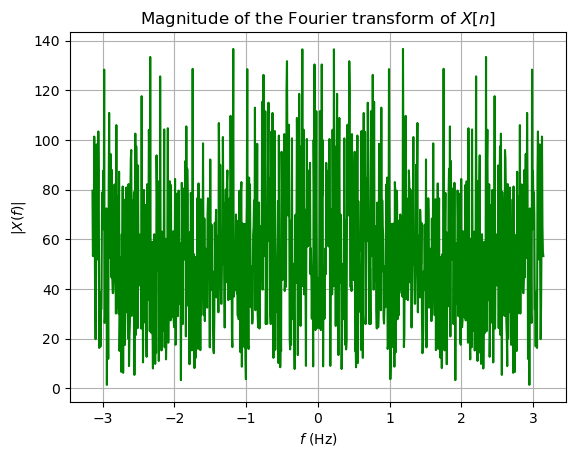

In [3]:
# Calculate the Fourier transform of the signal found in the previous section.

# Function to find the Fourier transform of a signal.
def spectrum(x):

    # Length of the vector x
    N = len(x)

    # Obtain the Fourier transform
    fourierX = fft(x)

    # Adjustment of the generated spectrum (shift and inversion)
    fourierX2 = fftshift(fourierX)

    # Magnitude of the Fourier transform
    mag = np.abs(fourierX2)

    # Generate frequency vector in hertz (interval [-pi,pi])
    freq = np.linspace(-np.pi, np.pi, N)
    
    return mag, freq

mag, f1 = spectrum(normal)

# Plot
plt.plot(f1, mag, color='g')
plt.grid()
plt.xlabel('$f$ (Hz)')
plt.ylabel('|$X(f)$|')
plt.title("Magnitude of the Fourier transform of $X[n]$")
plt.show()


### e) We now generate 9999 more realizations of the stochastic process in part c), and calculate the magnitude of the FT for each one. We plot the average of all the FTs for each frequency instant (i.e., magnitude vs. frequency). Analyze the results considering the fact that the stochastic process is called white noise.


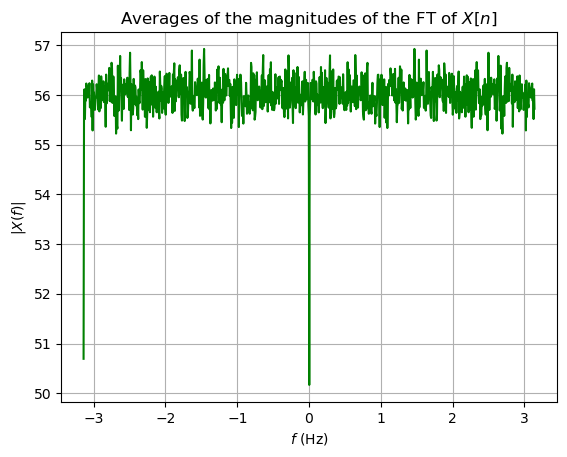

In [5]:
# Create a matrix to store all realizations of the stochastic process
realizations = np.zeros((len(n), 10000))
n1, m1 = np.shape(realizations)

# Store the realization found in previous sections in the first column of the matrix.
realizations[:, 0] = normal 

# Create each realization of the stochastic process and assign it to each column of the realizations matrix.
# Each column of the matrix corresponds to a realization of the stochastic process with mean 0 and variance 4 (standard deviation 2).
for j in range(1, m1):
    realizations[:, j] = np.random.normal(0, 2, len(n))

# Create a matrix of magnitudes to store the magnitude of the Fourier transform of each realization.
magnitudes = np.zeros((len(n), m1))

# For each realization, find its Fourier transform, and store the magnitude of each realization in each column of the magnitudes matrix.
for i in range(m1):
    X = realizations[:, i]
    magnitude, frequency = spectrum(X)
    magnitudes[:,i] = magnitude

# Create a list of averages
averages = []

# For each row of the magnitudes matrix, which represents the value of each FT of each realization for a specific frequency value,
# find the average. This average is stored in the list of averages, to finally obtain the average of each of the transforms
# in a single vector.
for i in range(np.shape(magnitudes)[0]):
    average = np.average(magnitudes[i])
    averages.append(average)

# Plot the average vector against frequency.
plt.plot(frequency, averages, color='g')
plt.xlabel('$f$ (Hz)')
plt.ylabel('|$X(f)$|')
plt.title("Averages of the magnitudes of the FT of $X[n]$")
plt.grid()
plt.show()


It can be noted that the frequency content of this signal shows that there is no prevalence of some frequencies over others, but rather it is a signal whose frequency content covers all frequencies. For this reason, it is called **white** noise, because the signal contains all frequencies of the spectrum.
